In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split as tts

# importing the dataset 

In [2]:
data = pd.read_csv("updated_dataset.csv")

In [3]:
data.head()

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year,Total Value (Cr),Total Volume (Mn)
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021.0,7980.58,24.16
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021.0,7478.58,24.31
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021.0,6238.13,21.91
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021.0,5280.04,18.43
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021.0,4338.53,15.45


In [4]:
UPI_Banks = list(data["UPI Banks"].values)
print(UPI_Banks)

['Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Airtel Payments Bank Apps', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Allahabad Bank App', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Amazon Pay', 'Andhra Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance Bank App', 'AU Small Finance B

# dropping the columns since they have high co-relation

In [5]:
data = pd.read_csv("preprocessed_data.csv")
data.head()

,UPI_Banks,Volume_Mn_By_Customers,Volume_Mn,Value_Cr,Month,Year,Total_Value_Cr,Total_Volume_Mn
0,Airtel Payments Bank Apps,9.04,15.12,5732.09,12,2021.0,7980.58,24.16
1,Airtel Payments Bank Apps,8.41,15.90,5554.63,11,2021.0,7478.58,24.31
2,Airtel Payments Bank Apps,7.60,14.31,4746.79,10,2021.0,6238.13,21.91
3,Airtel Payments Bank Apps,6.91,11.52,3759.12,9,2021.0,5280.04,18.43
4,Airtel Payments Bank Apps,6.14,9.31,2941.88,8,2021.0,4338.53,15.45


# distplot to check volume of transactions

<Figure size 600x600 with 0 Axes>

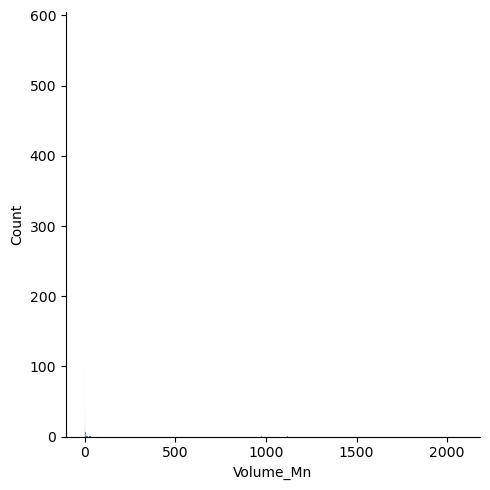

In [6]:
plt.figure(figsize=(6,6))
sns.displot(data['Volume_Mn'])
plt.show()
#they all are exact zero because excluding the UPI apps which are popular in the market does not have that much of volume

# pie chart

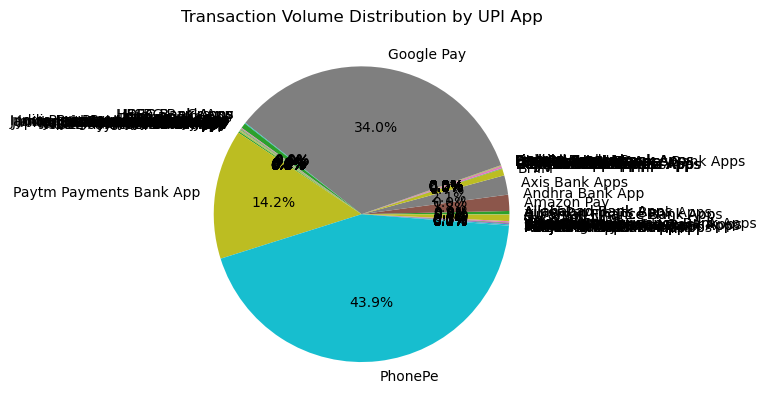

In [7]:
# Group the data by UPI app and calculate the total transaction volume for each app
volume_by_app = data.groupby("UPI_Banks")["Volume_Mn"].sum()

# Plot a pie chart of the transaction volume distribution by app
plt.pie(volume_by_app, labels=volume_by_app.index, autopct="%1.1f%%")
plt.title("Transaction Volume Distribution by UPI App")
plt.show()

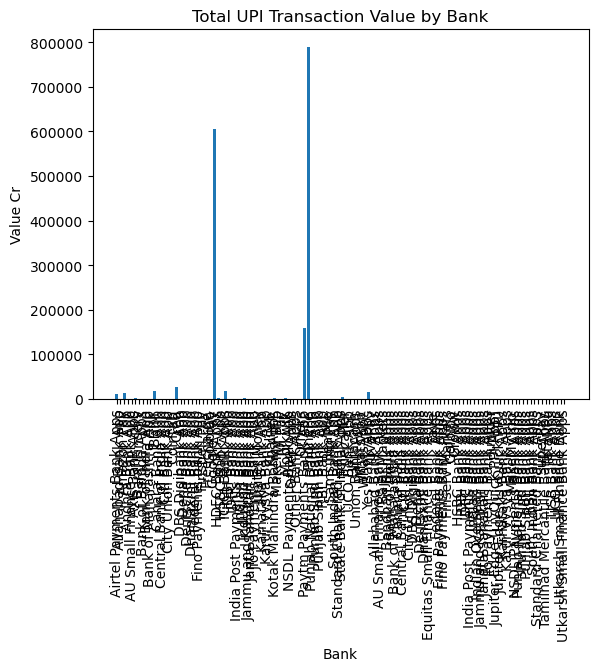

In [8]:
# Plot a bar chart to show the distribution of total value by bank
plt.bar(data["UPI_Banks"], data["Total_Value_Cr"])
plt.title("Total UPI Transaction Value by Bank")
plt.xlabel("Bank")
plt.ylabel("Value Cr")
plt.xticks(rotation=90)
plt.show()

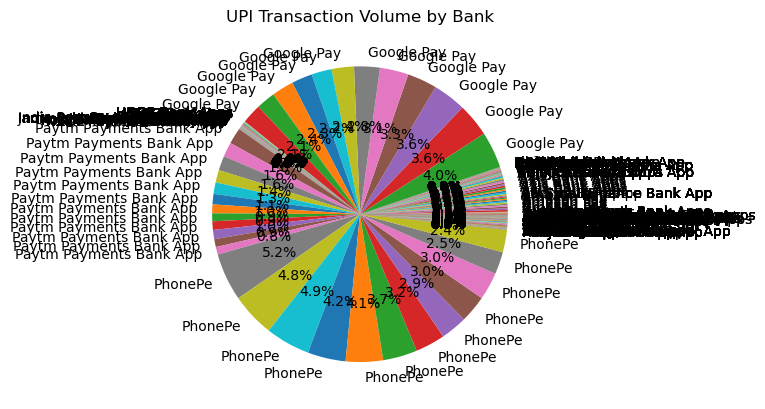

In [9]:
# Plot a pie chart to show the percentage of volume by bank
plt.pie(data["Volume_Mn"], labels=data["UPI_Banks"], autopct="%1.1f%%")
plt.title("UPI Transaction Volume by Bank")
plt.show()

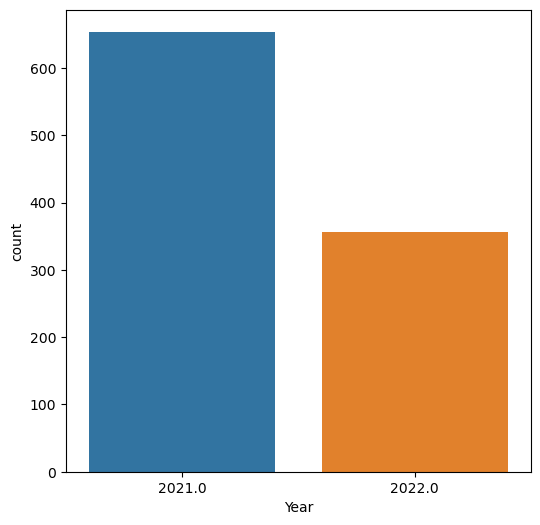

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='Year',data=data)
plt.show()

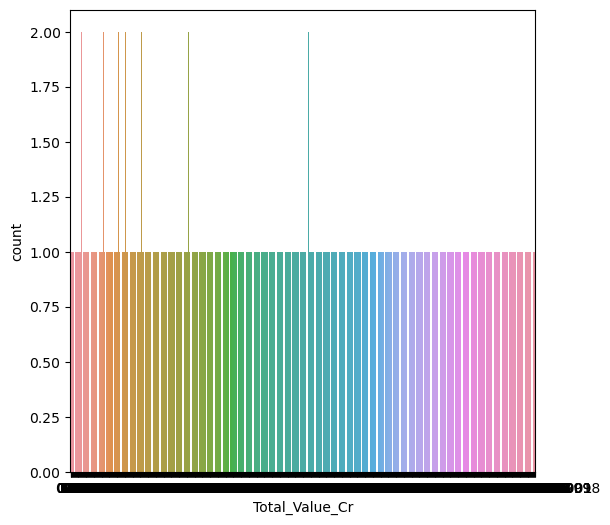

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='Total_Value_Cr',data=data)
plt.show()

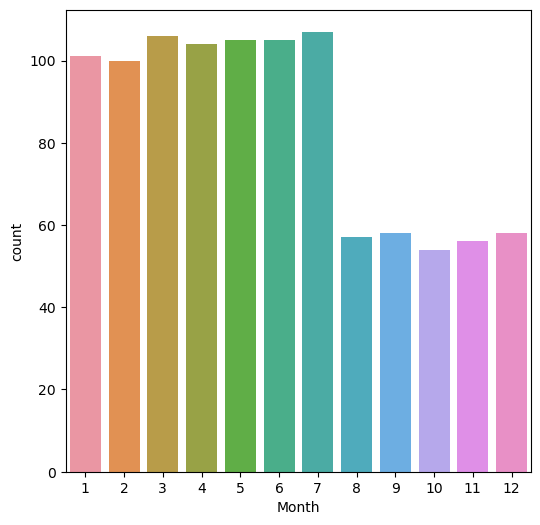

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='Month',data=data)
plt.show()

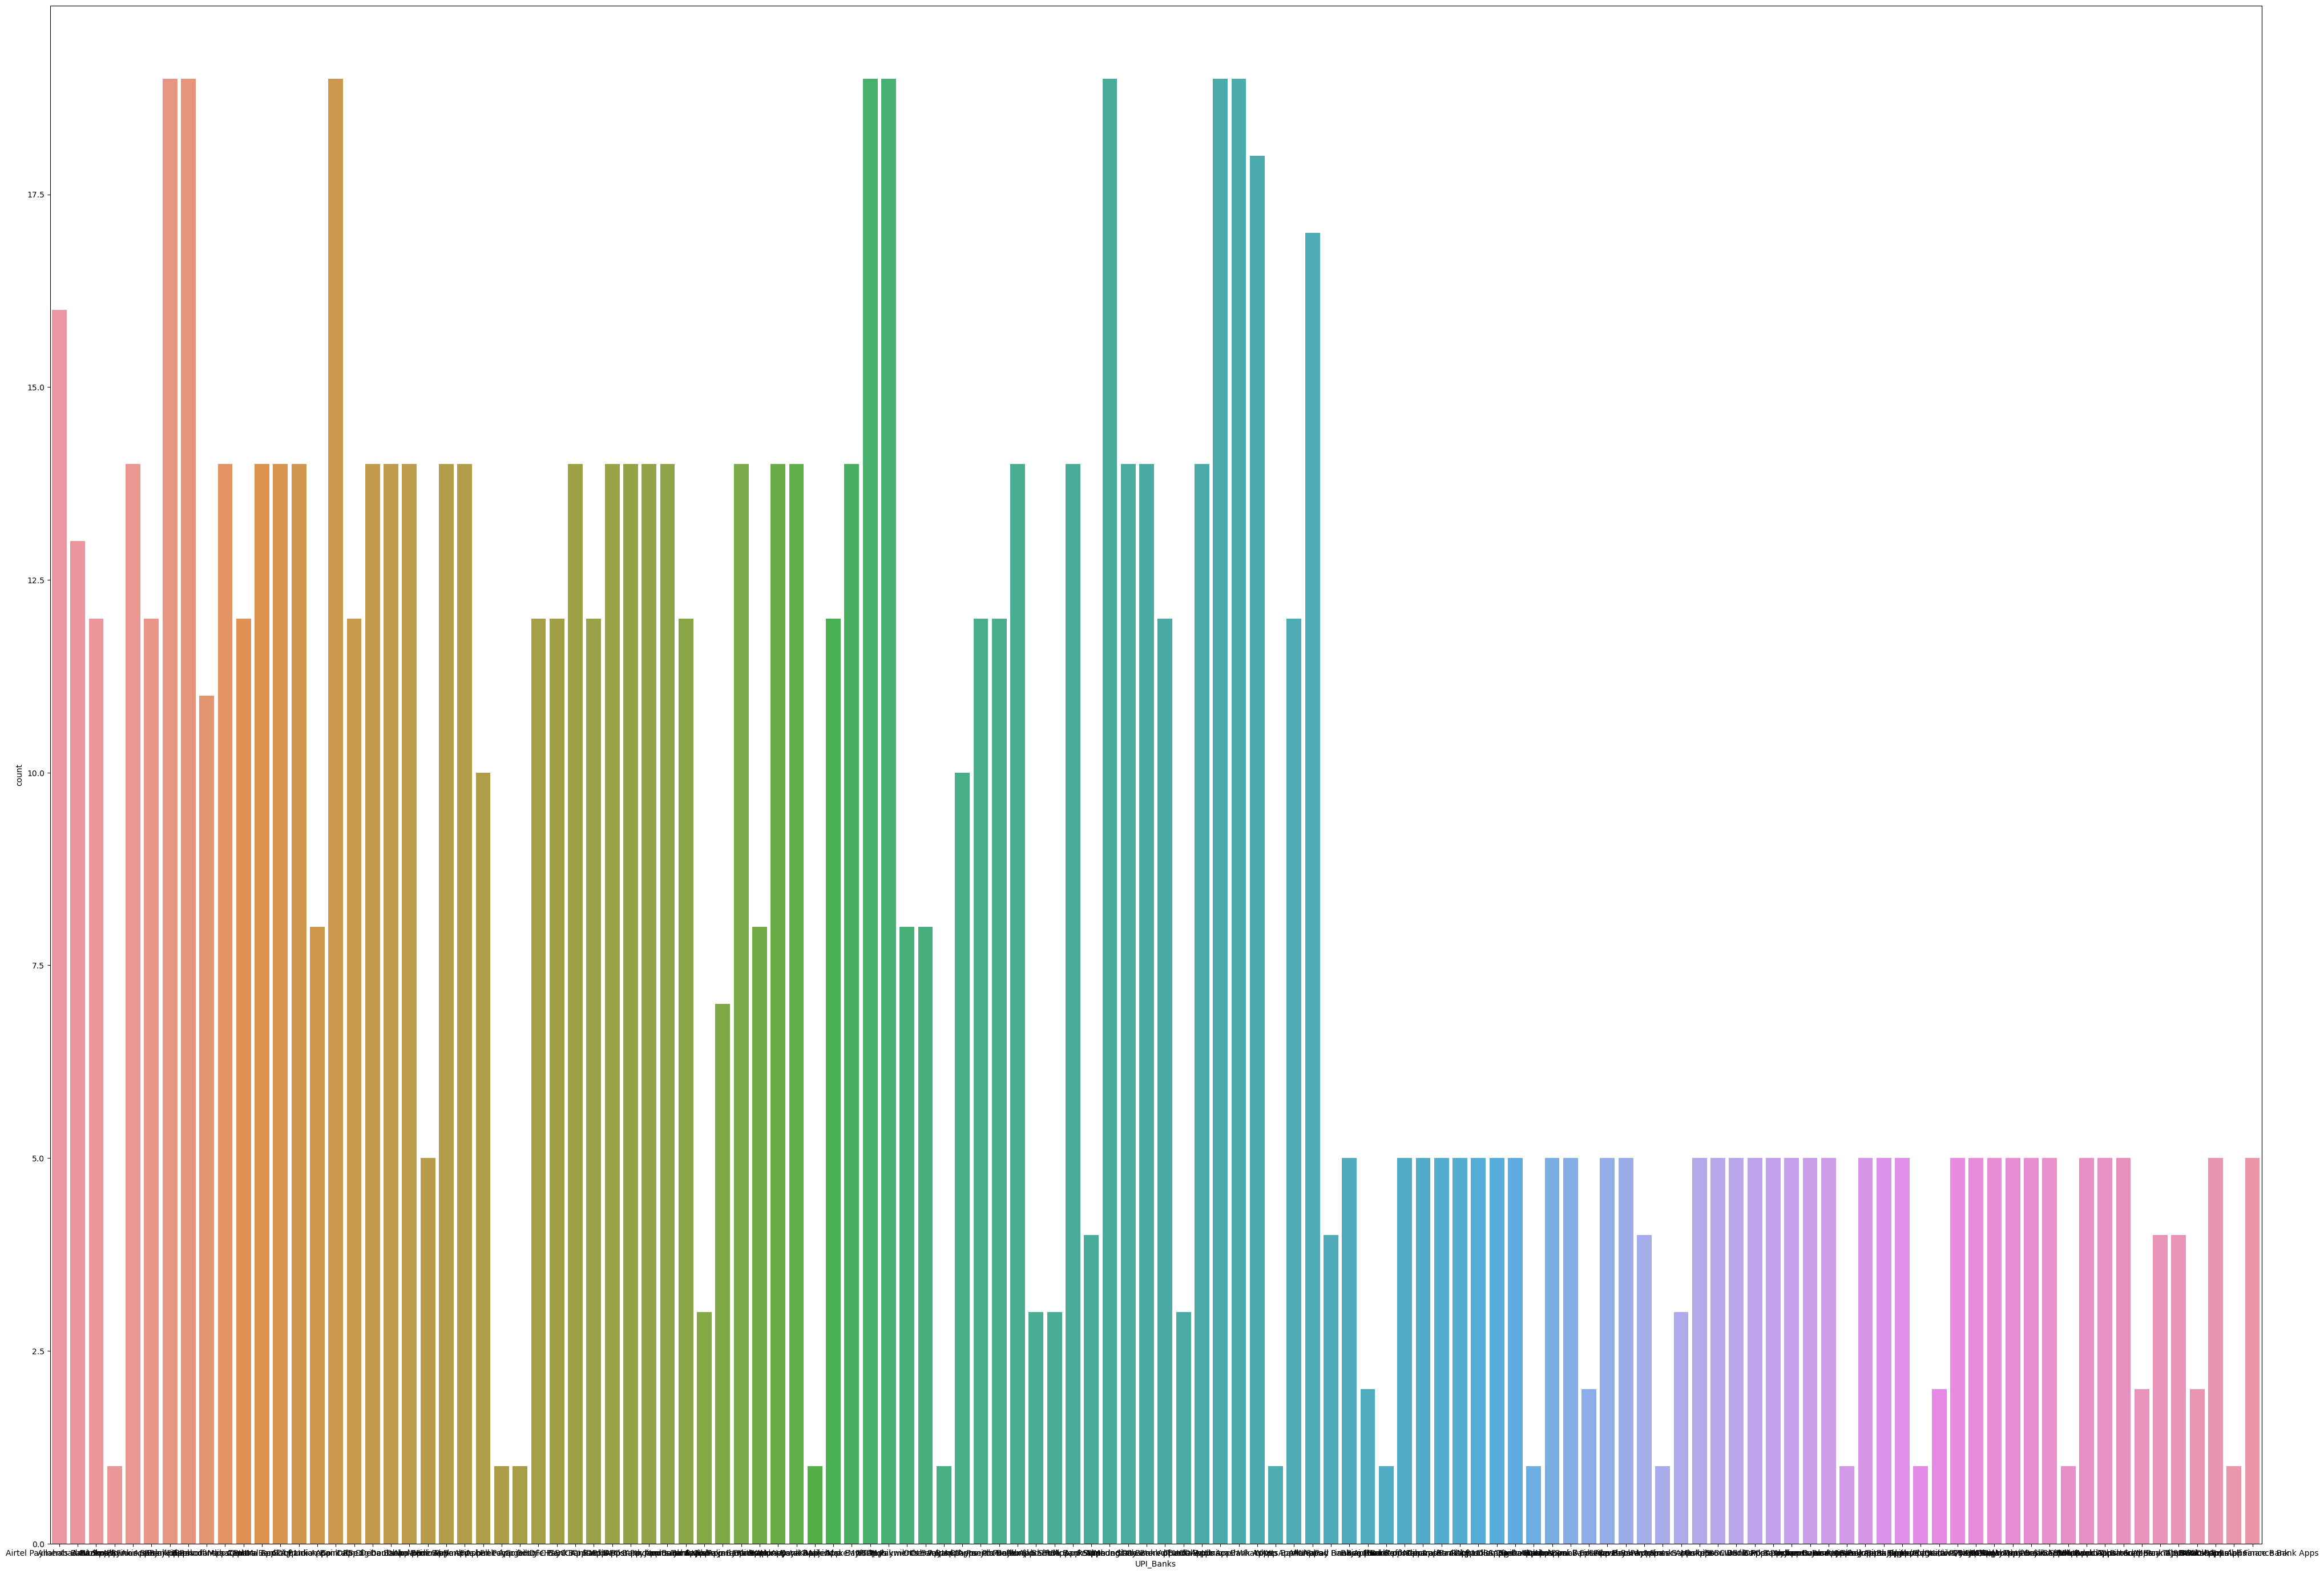

In [13]:
plt.figure(figsize=(50,35))
sns.countplot(x='UPI_Banks',data=data)
plt.show()

In [14]:
data['UPI_Banks'].value_counts()

Mobikwik           19
Ultracash          19
Samsung Pay        19
Cointab            19
Bajaj Finserv      19
                   ..
WhatsApp*           1
Freecharge          1
Goibibo             1
Other Bank Apps     1
Dena Bank Apps      1
Name: UPI_Banks, Length: 120, dtype: int64

In [15]:
#using label encoding to give unique numerical values for each and every upi app
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["UPI_Banks"] = le.fit_transform(data["UPI_Banks"])

In [16]:
data.head()

,UPI_Banks,Volume_Mn_By_Customers,Volume_Mn,Value_Cr,Month,Year,Total_Value_Cr,Total_Volume_Mn
0,2,9.04,15.12,5732.09,12,2021.0,7980.58,24.16
1,2,8.41,15.90,5554.63,11,2021.0,7478.58,24.31
2,2,7.60,14.31,4746.79,10,2021.0,6238.13,21.91
3,2,6.91,11.52,3759.12,9,2021.0,5280.04,18.43
4,2,6.14,9.31,2941.88,8,2021.0,4338.53,15.45


In [17]:
data['UPI_Banks'].value_counts()

82     19
112    19
99     19
25     19
9      19
       ..
117     1
44      1
46      1
86      1
30      1
Name: UPI_Banks, Length: 120, dtype: int64

In [18]:
UPI_Banks = list(data["UPI_Banks"].values)
print(UPI_Banks)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 23, 23, 23, 23, 23, 23, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 33, 33, 33, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 43, 43, 43, 43, 44, 46, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 47, 49, 49, 49, 49, 49, 49, 49,

In [19]:
x = data.drop(columns='Total_Value_Cr',axis = 1)
y = data['Total_Value_Cr']
# used drop method to drop the total value column, since that is what we need to predict

In [20]:
x.head()

,UPI_Banks,Volume_Mn_By_Customers,Volume_Mn,Value_Cr,Month,Year,Total_Volume_Mn
0,2,9.04,15.12,5732.09,12,2021.0,24.16
1,2,8.41,15.90,5554.63,11,2021.0,24.31
2,2,7.60,14.31,4746.79,10,2021.0,21.91
3,2,6.91,11.52,3759.12,9,2021.0,18.43
4,2,6.14,9.31,2941.88,8,2021.0,15.45


In [21]:
print(y)

0       7980.58
1       7478.58
2       6238.13
3       5280.04
4       4338.53
         ...   
1006     179.40
1007     210.78
1008     206.68
1009     177.90
1010     116.62
Name: Total_Value_Cr, Length: 1011, dtype: float64


In [22]:
print(y.head())

0    7980.58
1    7478.58
2    6238.13
3    5280.04
4    4338.53
Name: Total_Value_Cr, dtype: float64


In [23]:
print(x.head())

   UPI_Banks  Volume_Mn_By_Customers  Volume_Mn  Value_Cr  Month    Year  \
0          2                    9.04      15.12   5732.09     12  2021.0   
1          2                    8.41      15.90   5554.63     11  2021.0   
2          2                    7.60      14.31   4746.79     10  2021.0   
3          2                    6.91      11.52   3759.12      9  2021.0   
4          2                    6.14       9.31   2941.88      8  2021.0   

   Total_Volume_Mn  
0            24.16  
1            24.31  
2            21.91  
3            18.43  
4            15.45  


In [24]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=10)
xtrain

,UPI_Banks,Volume_Mn_By_Customers,Volume_Mn,Value_Cr,Month,Year,Total_Volume_Mn
193,27,0.52,0.52,167.48,2,2021.0,1.04
444,79,0.44,0.44,62.81,1,2021.0,0.88
384,73,0.25,0.25,30.03,12,2021.0,0.50
387,73,0.16,0.16,18.64,9,2021.0,0.32
953,102,0.12,0.12,64.70,2,2022.0,0.24
...,...,...,...,...,...,...,...
320,55,0.15,0.15,65.23,4,2021.0,0.30
527,96,0.12,0.12,48.58,1,2021.0,0.24
996,115,0.01,0.01,3.47,6,2022.0,0.02
125,17,0.09,0.09,43.87,4,2021.0,0.18


In [25]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score

# Create the Lasso regression model
lasso_model = Lasso(alpha=0.1)

# Train the model
lasso_model.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = lasso_model.predict(xtest)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error:", mse)

# Evaluate the model using R-squared value
r2 = r2_score(ytest, y_pred)
print("R-squared value:", r2)

Mean Squared Error: 1127796.0796174177
R-squared value: 0.9998749721101239


C:\Users\Anju Reddy K\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.873e+08, tolerance: 4.683e+08
  model = cd_fast.enet_coordinate_descent(


In [26]:
print(xtrain.columns)

Index(['UPI_Banks', 'Volume_Mn_By_Customers', 'Volume_Mn', 'Value_Cr', 'Month',
       'Year', 'Total_Volume_Mn'],
      dtype='object')


In [27]:
lasso_model.predict([[50,9.0,15.0,1200,12,2023,24]])

C:\Users\Anju Reddy K\anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([1353.41848875])

In [28]:
import pickle

# Save the trained Lasso model as a .pkl file
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

In [29]:
# Save the LabelEncoder object as a .pkl file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)